In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize

In [78]:
from Painter import Painter
from config import config

In [79]:
name_a, name_b = config.samples[config.task.name].reference, config.samples[config.task.name].target

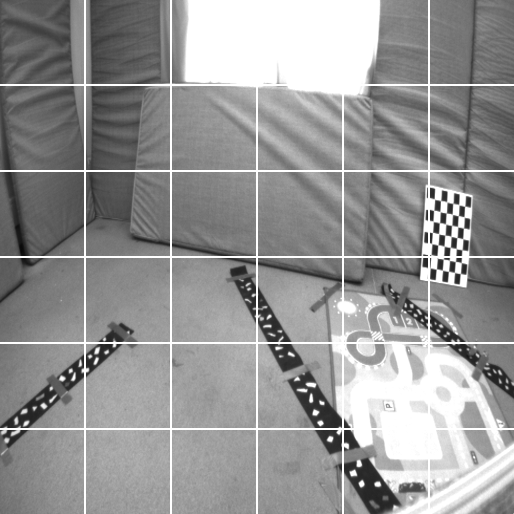

In [80]:
Painter.show_patches(name_a)

# Keypoints

INFO     | show_keypoints | Number of Keypoints 1145


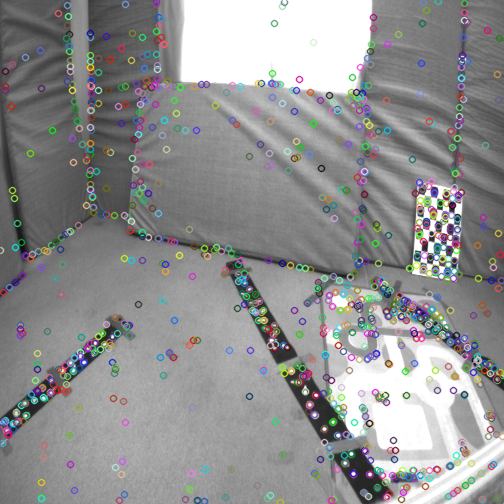

In [81]:
Painter.show_keypoints(name_a, level='both', filtered=False)

INFO     | show_keypoints | Number of Keypoints 464


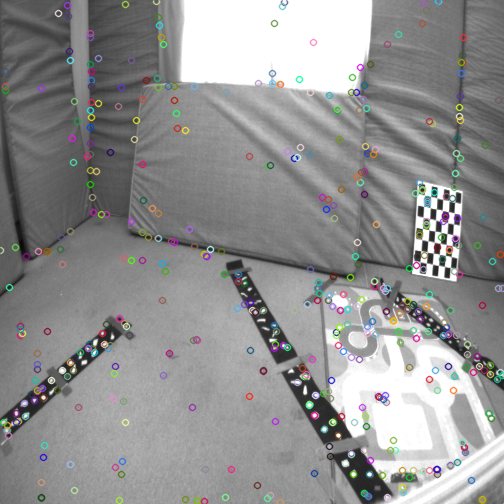

In [82]:
Painter.show_keypoints(name_a, level='both', filtered=True)

INFO     | _show_keypoints | Number of Keypoints 175


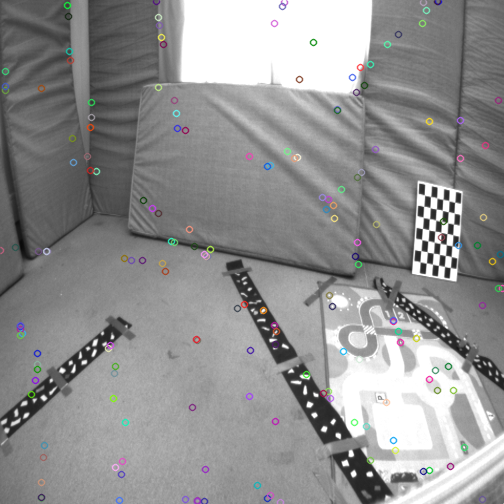

In [83]:
Painter.show_keypoints(name_a, level='patch', filtered=False)

In [89]:
# Painter.show_keypoints(name_a, level='patch', filtered=True)

# Matches

INFO     | show_matches | Number of Matches 857


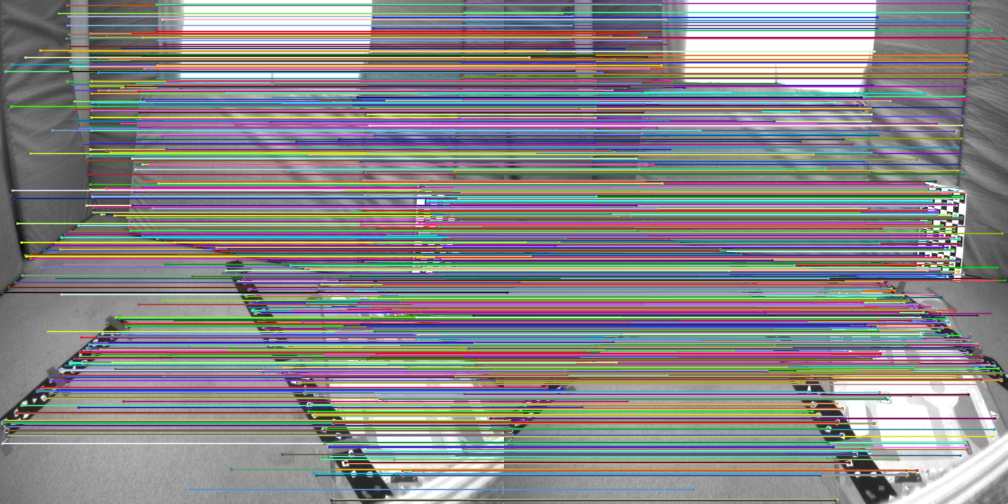

In [85]:
Painter.show_matches(name_a, name_b, num_points=None) 

INFO     | show_filtered_matches | Number of Matches 379


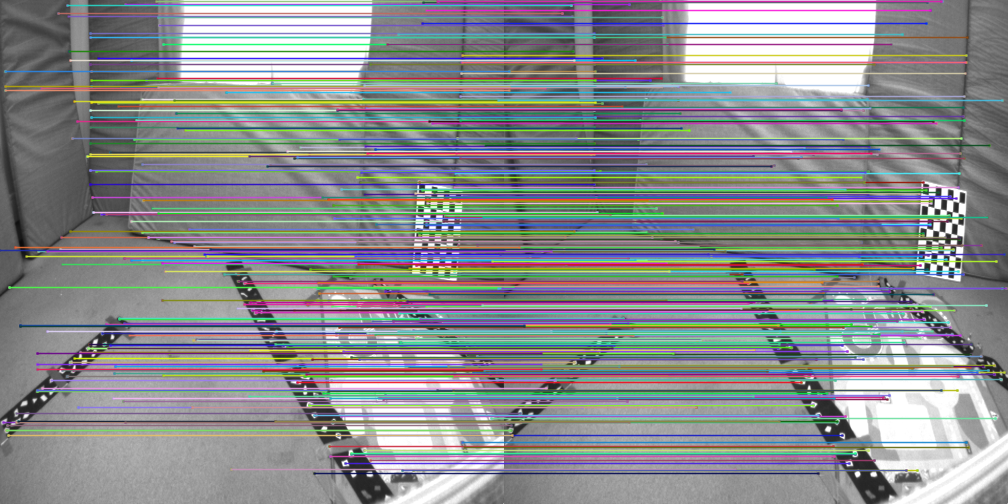

In [86]:
Painter.show_filtered_matches(name_a, name_b, num_points=None)

# Utils

In [87]:
def adjust_dimensions(height, width, scale_factor, patch_size=16):
    # Scale the dimensions
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Find the nearest dimension divisible by both 14 and patch_size
    def nearest_divisible(value, divisor):
        return value - (value % divisor) + (divisor if value % divisor != 0 else 0)
    
    # Ensure new dimensions are divisible by 14 and patch_size
    new_height = nearest_divisible(new_height, 14 * patch_size // 14)
    new_width = nearest_divisible(new_width, 14 * patch_size // 14)

    return new_height, new_width

# Example usage
original_height = 752
original_width = 480
scale_factor = 0.75
patch_size = 64

new_height, new_width = adjust_dimensions(original_height, original_width, scale_factor, patch_size)
print(f"Adjusted dimensions: {new_height}x{new_width}")


Adjusted dimensions: 576x384


In [88]:
def find_divisible_numbers(start, end, num1, num2):
    """
    Finds all numbers in the range [start, end] that are divisible by both num1 and num2.

    Parameters:
    start (int): The starting number of the range (inclusive).
    end (int): The ending number of the range (inclusive).
    num1 (int): The first divisor.
    num2 (int): The second divisor.

    Returns:
    list: A list of numbers divisible by both num1 and num2.
    """
    divisible_numbers = []

    for num in range(start, end + 1):
        if num % num1 == 0 and num % num2 == 0:
            divisible_numbers.append(num)

    return divisible_numbers

# Example usage
start = 400
end = 800
num1 = 14
num2 = 84
result = find_divisible_numbers(start, end, num1, num2)
print(f"Numbers divisible by {num1} and {num2} between {start} and {end}: {result}")


Numbers divisible by 14 and 84 between 400 and 800: [420, 504, 588, 672, 756]
